In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.utils import visualize_util
import pandas as pd
import numpy as np
from spectrum import *
import matplotlib.pyplot as plt


In [6]:
%matplotlib inline  

In [2]:
def create_network_short(lags, batch_size, retain_state):
    if retain_state is False:
        batch_size = 1
    model = Sequential()
    model.add(LSTM(28, batch_input_shape=(batch_size, lags, 1), return_sequences=True, dropout_W=0.1, dropout_U=0.1, stateful=retain_state))
    model.add(LSTM(28, batch_input_shape=(batch_size, lags, 1), return_sequences=True, dropout_W=0.1, dropout_U=0.1, stateful=retain_state))
    model.add(LSTM(28, batch_input_shape=(batch_size, lags, 1), return_sequences=True, dropout_W=0.1, dropout_U=0.1, stateful=retain_state))
    model.add(LSTM(14, batch_input_shape=(batch_size, lags, 1), stateful=retain_state))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

In [10]:
model = create_network_short(28, 6, True)

In [11]:
visualize_util.plot(model, "model.png", show_shapes=True)

In [22]:
def buildLaggedFeatures(s,lag=2,dropna=True):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print 'Only works for DataFrame or Series'
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [15]:
arr = pd.read_csv("../data/Sample/333_arrivals.csv", header=None)[1]
arr.head()

0     2
1    21
2    13
3     5
4     7
Name: 1, dtype: int64

In [27]:
lagged = buildLaggedFeatures(arr, lag=7)
lagged.columns = ["Y", "Lag_1", "Lag_2", "Lag_3", "Lag_4", "Lag_5", "Lag_6", "Lag_7"]
lagged.head(7)

,Y,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
7,9,7.0,19.0,7.0,5.0,13.0,21.0,2.0
8,13,9.0,7.0,19.0,7.0,5.0,13.0,21.0
9,5,13.0,9.0,7.0,19.0,7.0,5.0,13.0
10,8,5.0,13.0,9.0,7.0,19.0,7.0,5.0
11,18,8.0,5.0,13.0,9.0,7.0,19.0,7.0
12,14,18.0,8.0,5.0,13.0,9.0,7.0,19.0
13,15,14.0,18.0,8.0,5.0,13.0,9.0,7.0


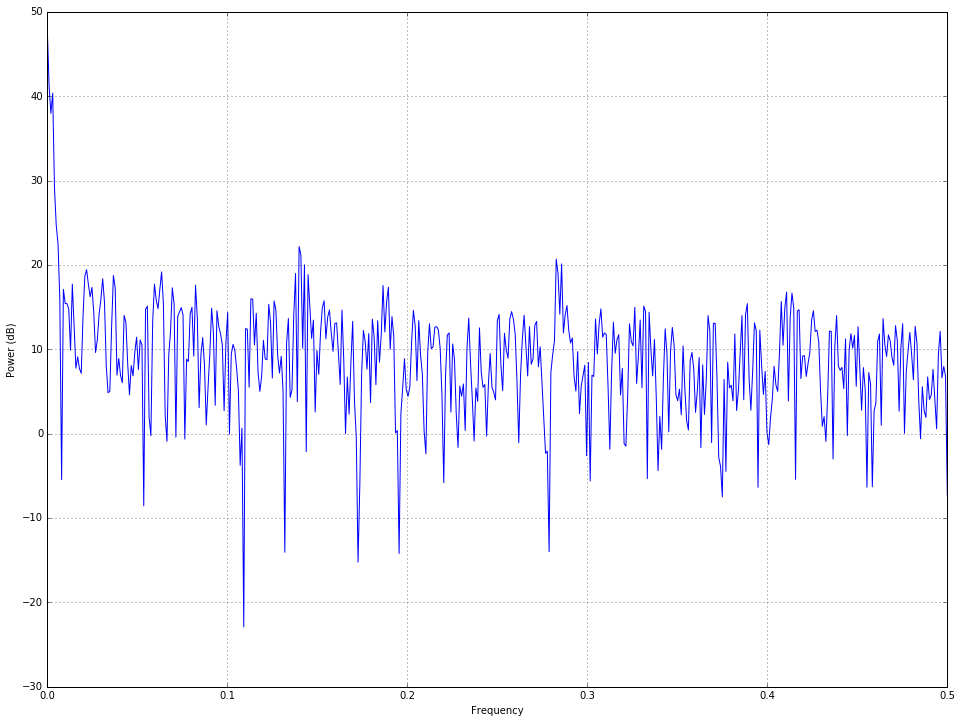

In [51]:
p = Periodogram(arr)
p.run()

fig = plt.figure()
fig.subplots_adjust(right=1.5)
fig.subplots_adjust(top=1.5)
fig.set_size_inches(20, 15)
ax = fig.add_subplot(221)

p.plot(ax=ax)

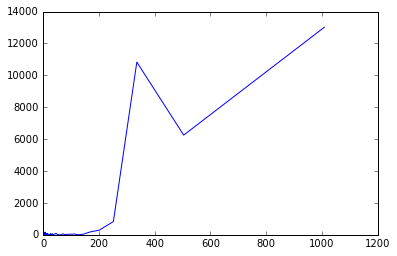

In [67]:
import math
plt.plot(1/np.array(p.frequencies()), p.psd)

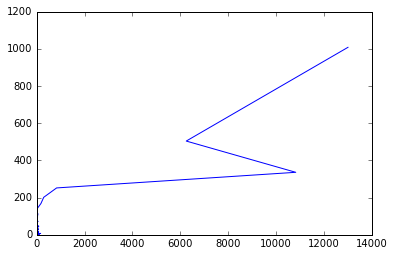

In [68]:
plt.plot(p.psd,1/np.array(p.frequencies()))

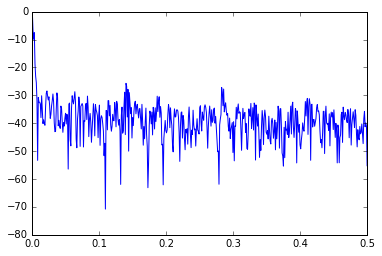

In [81]:
import pylab

plt.plot(np.array(p.frequencies()), 10*np.log10(p.psd/max(p.psd)))
